# Catlinh Nguyen
# Student ID: 1977169
UCSC Spring 2025 Final project
Redo with jw02731-o001_t017_nircam_clear-f090w_i2d.fits
Step 3 of ASTR-119 Final project: Re-do SEP Tutorial below as Python notebook (this doc)
https://sep.readthedocs.io/en/stable/tutorial.html

 # Step 1: Import astropy.io.fits and related modules

In [1]:
# Packages to do image processing using astropy.io.fits
import numpy as np
import sep

# Additional setup for reading images and plotting
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

# Additional imports for file/directory
import os

# Reference URLs
# https://docs.astropy.org/en/stable/io/fits/index.html#module-astropy.io.fits (astropy fits to use)
# https://docs.astropy.org/en/stable/io/fits/appendix/faq.html 
# https://philuttley.github.io/prog4aa_lesson2/10-fitsfiles/index.html (explain FITS file)


# Step 2: Set up MathPlot and rc parameters to 10x8 inches
Tell Jupyter to display a mathplot graph directly on the Python notebook.
Set the size of the graph to 10x8 inches.

In [3]:

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]



# Step 3: Open download file,
inspect and extract content, convert content to float and display.
Following step [3] and [4] of the tutorial, read the fits image into a standard 2-dimensional array.
This 'image.fits' was saved from the tutorial, using vertopal.com site to convert to FITS format.
Save the output to a file.

Input: "images.fits"
Ouput: "image1.png"

Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\data\jw02731-o001_t017_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     365   ()      
  1  SCI           1 ImageHDU        75   (14339, 8582)   float32   
  2  ERR           1 ImageHDU        10   (14339, 8582)   float32   
  3  CON           1 ImageHDU        10   (14339, 8582, 6)   int32   
  4  WHT           1 ImageHDU         9   (14339, 8582)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14339, 8582)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14339, 8582)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14339, 8582)   float32   
  8  HDRTAB        1 BinTableHDU    532   160R x 261C   [23A, 5A, 3A, 45A, 6A, 13A, 7A, 5A, 6A, 7A, 10A, 4A, L, D, D, 32A, 50A, 32A, 21A, 3A, 3A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D, D, D, D, 27A, D, D, 

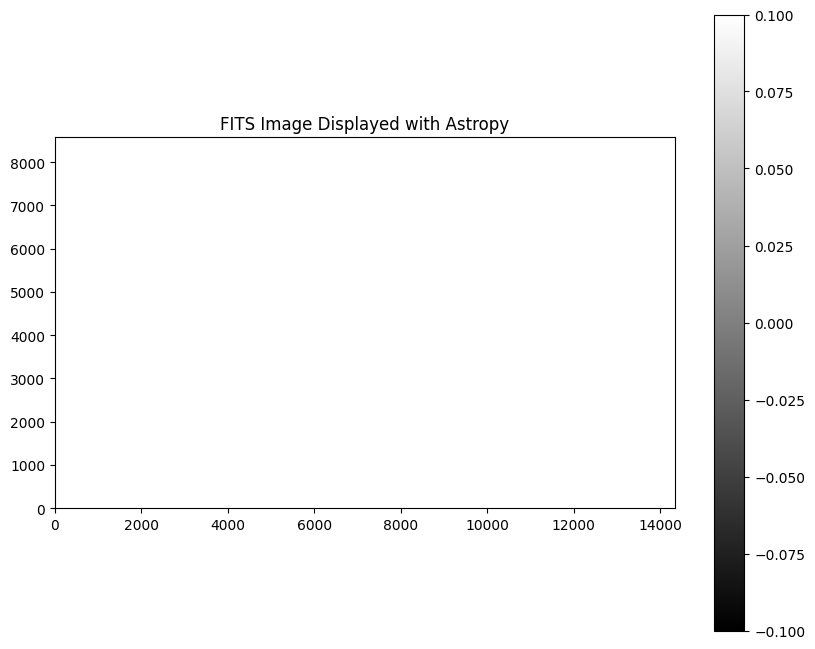

In [4]:
# [3], [4]
# 3.1 SHOW THE IMAGE
cwd = os.getcwd()

# f_name = "image.fits"
# (file below is required for next step of project)
f_name = "jw02731-o001_t017_nircam_clear-f090w_i2d.fits"
#
# Construct a file path so that it works on both Linux and Windows
filename = os.path.join(cwd,"data",f_name)
if not os.path.exists(filename):
    exit(f"File {filename} doesn't exists!")

hdul = fits.open(filename)
# Display info
hdul.info()

# Get data and convert to float for SEP
# data = hdul[0].data.astype(np.float32)

# Try accessing the 'SCI' extension if it exists
if 'SCI' in hdul:
    data = hdul['SCI'].data.astype(np.float32)
else:
    if hdul[0].data is not None:
        data = hdul[0].data.astype(np.float32)
    else:
        data = hdul[1].data.astype(np.float32)  # Fallback: use first extension after primary

# Display the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("FITS Image Displayed with Astropy")

# Save image to PNG
plt.savefig("image1.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
# (must savefig() before show())
plt.show()

# Close data
hdul.close()


# Step 5: Following step 5..11 in the Tutorials, do:
Create empty mask
Estimate the background
Evaluate background noise
Plot the background noise
Finally Subtract background to get a clear image
Save to image2.png and image3.png

Global Background Mean: 1.1997147798538208
Global Background RMS: 0.06582547724246979


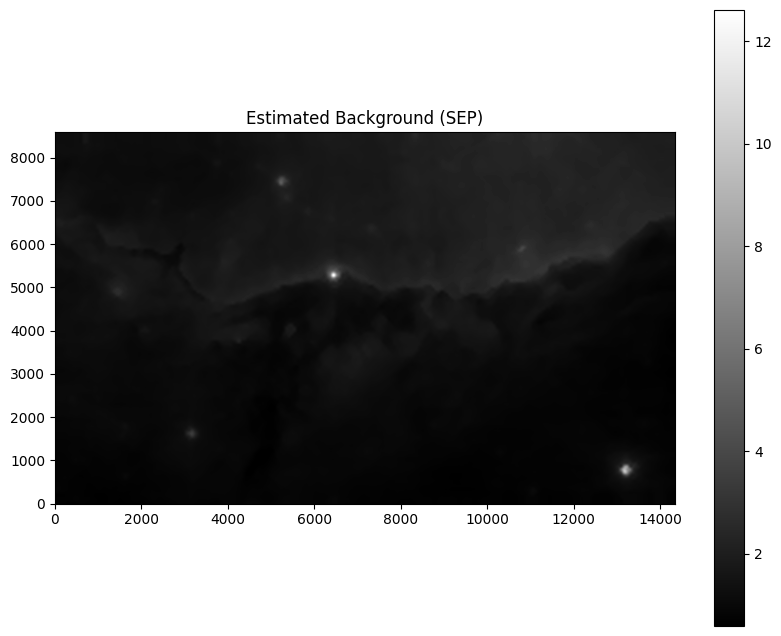

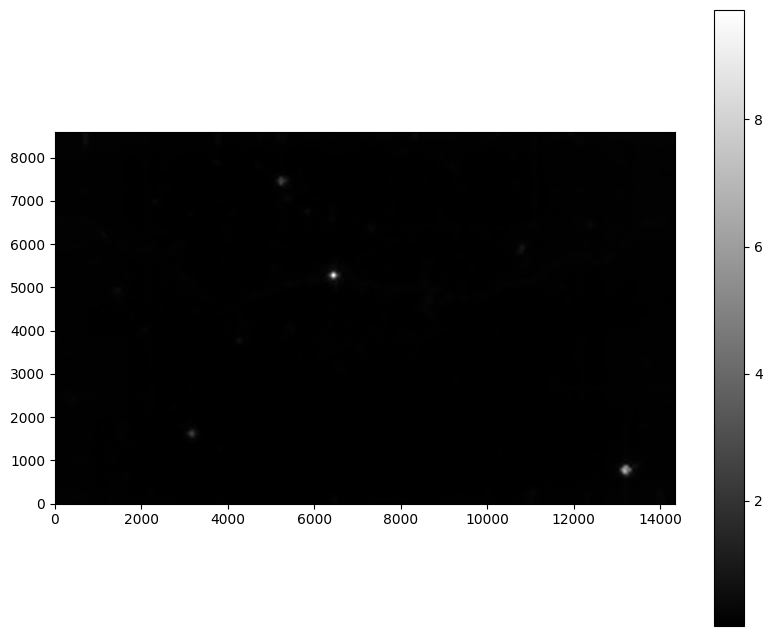

In [5]:
# [5]
# Create an empty mask (no pixels are masked)
mask = np.zeros_like(data, dtype=bool)

# Measure the background with a 64x64 grid and 3x3 filter for smoothing
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

# [6]
# --- Step 4: Print global background stats ---
print("Global Background Mean:", bkg.globalback)
print("Global Background RMS:", bkg.globalrms)
# [7]
# --- Step 5: Show the 2D background model ---
bkg_image = bkg.back()
# [8]
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Estimated Background (SEP)")
# Save image to PNG
plt.savefig("image2.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
plt.show()

# [9]
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()
# show the background noise
# [10]
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
# Save image to PNG
plt.savefig("image3.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
# [11]
# subtract the background
data_sub = data - bkg

# Step 4: Following step 12, 13 of Tutorials, extract objects above 1.5× RMS noise threshold
Use a threshhold of 1.5 x local noise RMS. Ignore pixels not brighter than this number
to set a better image.
Count the number of selected objects.

The file jw02731-o001_t017_nircam_clear-f090w_i2d.fits is too big, so I have to increase
the threshhold from 1.5 to 20.
I tried setting sep.set_extract_pixstack(1000000). It worked but VS hang.

In [6]:
# Extract objects above 1.5× RMS noise threshold ---
# (for part-2 since image file is too big, I have to set threshhold to 20)
# 
# [12]
objects = sep.extract(data_sub, thresh=20, err=bkg.globalrms)
# [13]
len(objects)

9309

# How many sources?
9309 sources


# Step 5: Following step 14 of Tutorials, plot the subtracted background.
Display the subtracted image in prev. step. 
Draw a red ellipses around each detected object.
Save to image4.png

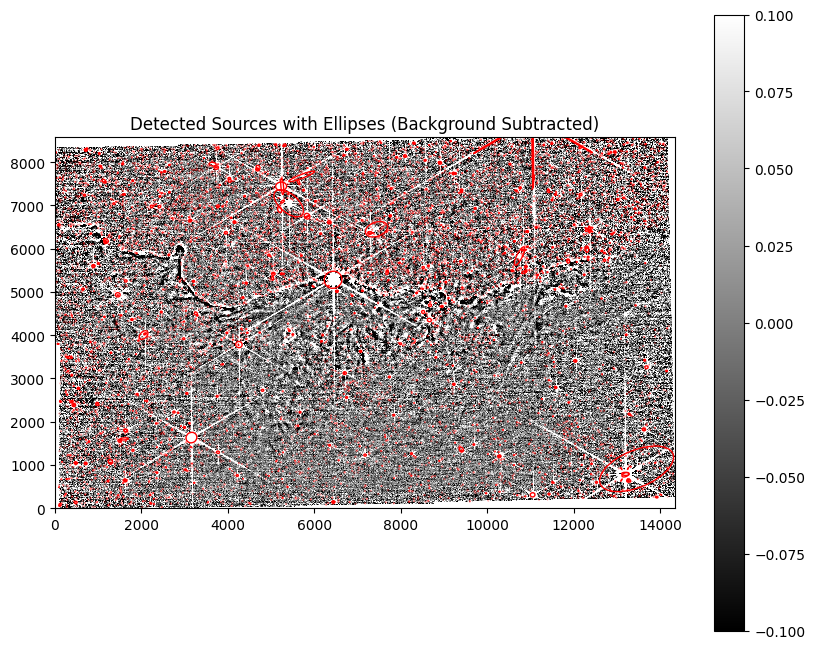

In [7]:
# [14]
# Plot background-subtracted image ---
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m - s, vmax=m + s, origin='lower')

# Plot ellipses for detected objects ---
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6 * obj['a'],
                height=6 * obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Sources with Ellipses (Background Subtracted)")
plt.colorbar(im)
# Save image to PNG
plt.savefig("image4.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
plt.show()

# Step 6: Following step 15 of Tutorials, 
print available fields (columns) for each detected object in prev. step.

In [8]:
# available fields
# [15]
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# Step 7: Following step 16, 17 of Tutoralial, do Aperture photometry
Set up aperture
Print the results

Photometry for first 10 objects:
Object 0: flux = 36.428 ± 6.046
Object 1: flux = 249.788 ± 15.809
Object 2: flux = 36.349 ± 6.039
Object 3: flux = 473.846 ± 21.771
Object 4: flux = 56.727 ± 7.540
Object 5: flux = 80.468 ± 8.977
Object 6: flux = 168.049 ± 12.968
Object 7: flux = 510.251 ± 22.591
Object 8: flux = 91.690 ± 9.582
Object 9: flux = 39.741 ± 6.314


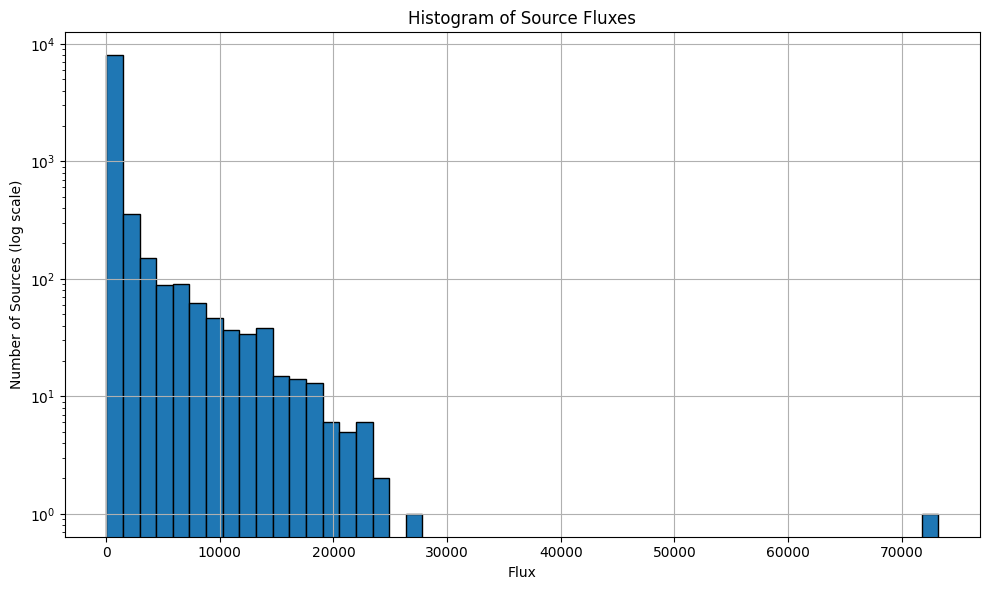

In [9]:
# Perform circular aperture photometry ---
# Use aperture radius = 3.0 pixels, gain = 1.0
# [16]
flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'], objects['y'],
    3.0,
    err=bkg.globalrms,
    gain=1.0
)
# [17] show the first 10 objects results:
# --- Step 5: Print photometry results for the first 10 objects ---
print("Photometry for first 10 objects:")
for i in range(min(10, len(flux))):
    print("Object {:d}: flux = {:.3f} ± {:.3f}".format(i, flux[i], fluxerr[i]))

# Extend code to do Histograms of fluxes
# Filter out invalid fluxes (e.g., negative or nan)
flux = flux[np.isfinite(flux) & (flux > 0)]

# Plot histogram (log scale recommended)
plt.figure(figsize=(10, 6))
plt.hist(flux, bins=50, log=True, edgecolor='black')
plt.xlabel("Flux")
plt.ylabel("Number of Sources (log scale)")
plt.title("Histogram of Source Fluxes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Set byte order for Numpy >= 2.0
Preserve the original data, set up byte order for Numpy's version >= 2.0

In [10]:
# Numpy >= 2.0
# Copies data to a new array, preserves the ordering of the original array
new_data = data.astype(data.dtype.newbyteorder("="))
# The same outcome as the previous operation
new_data = data.byteswap()
new_data = new_data.view(new_data.dtype.newbyteorder("="))
# Changes data in-place
data = data.byteswap()
data = data.view(data.dtype.newbyteorder("="))

# Step 9: Correct treatment in presence of variable noise,
save to file "synthetic_image.fits"
output: "synthetic_image.fits

Set up a grid 
Create an error map with random noises to insert fake source
Save the fits file and display the image

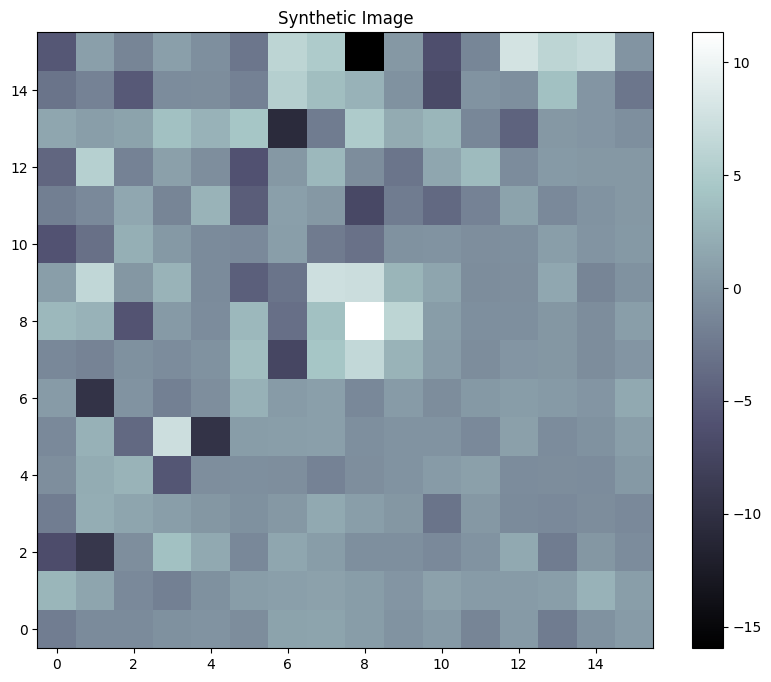

In [11]:
# Generate synthetic data ---
n = 16
X, Y = np.meshgrid(np.arange(n), np.arange(n))
mask = Y > X

error = np.ones((n, n))
error[mask] = 4.0
data = error * np.random.normal(size=(n, n))

# Add a fake source to the center
source = 3.0 * np.array([[1., 2., 1.],
                         [2., 4., 2.],
                         [1., 2., 1.]])
m = n // 2 - 1
data[m:m+3, m:m+3] += source

# Save to FITS using astropy.io.fits ---
hdu = fits.PrimaryHDU(data)
hdu.writeto("synthetic_image.fits", overwrite=True)

# Display the image ---
plt.imshow(data, interpolation='nearest', origin='lower', cmap='bone')
plt.title("Synthetic Image")
plt.colorbar()
plt.show()

# mean, median, and standard deviation of the flux distribution

In [ ]:
# Filtered fluxes from SEP (already cleaned: > 0, finite)
valid_flux = flux[np.isfinite(flux) & (flux > 0)]

# Calculate statistics
mean_flux = np.mean(valid_flux)
median_flux = np.median(valid_flux)
std_flux = np.std(valid_flux)

# Display results
print(f"Mean flux:   {mean_flux:.3f}")
print(f"Median flux: {median_flux:.3f}")
print(f"Std. Dev:    {std_flux:.3f}")

Mean flux:   835.659
Median flux: 101.481
Std. Dev:    2512.761


# Find largest outliers, locations on pic and how many deviations away?
(Remember to use the same threshhod 20 to avoid too many pixels)

In [18]:
# Assume flux is your NumPy array (1D or 2D)
valid_mask = np.isfinite(flux) & (flux > 0)
valid_flux = flux[valid_mask]

# Calculate stats
mean_flux = np.mean(valid_flux)
median_flux = np.median(valid_flux)
std_flux = np.std(valid_flux)

print(f"Mean flux:   {mean_flux:.3f}")
print(f"Median flux: {median_flux:.3f}")
print(f"Std. Dev:    {std_flux:.3f}")

# Z-score array
z_scores = np.full_like(flux, fill_value=-np.inf, dtype=float)
z_scores[valid_mask] = (flux[valid_mask] - mean_flux) / std_flux

# Top 10 outliers
flat_indices = np.argpartition(z_scores.flatten(), -10)[-10:]
top_indices = flat_indices[np.argsort(z_scores.flatten()[flat_indices])[::-1]]

# Get original positions
positions = [np.unravel_index(i, flux.shape) for i in top_indices]

print("\n=== Top 10 Flux Outliers with position in image and how far away from std. dev. ===")
for i, pos in enumerate(positions):
    flux_val = flux[pos]
    z = z_scores[pos]
    if flux.ndim == 1:
        print(f"{i+1}. Index {pos[0]} - Flux: {flux_val:.2f} - Z-score: {z:.2f}")
    else:
        print(f"{i+1}. Position (y={pos[0]}, x={pos[1]}) - Flux: {flux_val:.2f} - Z-score: {z:.2f}")


Mean flux:   835.659
Median flux: 101.481
Std. Dev:    2512.761

=== Top 10 Flux Outliers with position in image and how far away from std. dev. ===
1. Index 1275 - Flux: 73213.79 - Z-score: 28.80
2. Index 3919 - Flux: 27348.10 - Z-score: 10.55
3. Index 457 - Flux: 24506.44 - Z-score: 9.42
4. Index 4142 - Flux: 23754.33 - Z-score: 9.12
5. Index 300 - Flux: 22924.12 - Z-score: 8.79
6. Index 729 - Flux: 22717.29 - Z-score: 8.71
7. Index 4954 - Flux: 22657.22 - Z-score: 8.68
8. Index 3939 - Flux: 22600.85 - Z-score: 8.66
9. Index 8958 - Flux: 22443.50 - Z-score: 8.60
10. Index 4770 - Flux: 22114.81 - Z-score: 8.47


# Step 10: Extract sources using 'conv' and 'matched' filter.

In [19]:
# Extract sources using filter_type='conv' ---
objects_conv = sep.extract(data, thresh=3.0, err=error, filter_type='conv')
print("Number of objects (conv filter):", len(objects_conv))

#  Extract sources using filter_type='matched' ---
objects_matched = sep.extract(data, thresh=3.0, err=error, filter_type='matched')
print("Number of objects (matched filter):", len(objects_matched))

Number of objects (conv filter): 1
Number of objects (matched filter): 1


# Step 11: Derivation of the matched filter formula with different subpixel sampling,
then display first 3 objects.

In [20]:
# Detect sources ---
objs = sep.extract(data, thresh=3.0)

# Sum flux in circles of constant radius 3.0 ---
flux1, fluxerr1, flag1 = sep.sum_circle(data, objs['x'], objs['y'], 3.0)

# Use array of radii (broadcasting) ---
radii = 3.0 * np.ones(len(objs))  # example: radius per object
flux2, fluxerr2, flag2 = sep.sum_circle(data, objs['x'], objs['y'], radii)

# Use exact (non-subpixel-sampled) aperture integration ---
flux3, fluxerr3, flag3 = sep.sum_circle(data, objs['x'], objs['y'], 3.0, subpix=0)

# Display results for the first 3 objects ---
for i in range(min(3, len(objs))):
    print(f"Object {i}: flux = {flux1[i]:.3f} ± {fluxerr1[i]:.3f} (subpix=5)")
    print(f"         flux = {flux2[i]:.3f} ± {fluxerr2[i]:.3f} (array radius)")
    print(f"         flux = {flux3[i]:.3f} ± {fluxerr3[i]:.3f} (subpix=0)")

Object 0: flux = 31.902 ± 0.000 (subpix=5)
         flux = 31.902 ± 0.000 (array radius)
         flux = 31.836 ± 0.000 (subpix=0)


# Step 12: Aperture photometry
Compare 5 ways to do aperture photometry to see how the dirrences impact flux errors.

In [21]:
# Use global background RMS error + gain (background-subtracted) ---
flux1, fluxerr1, flag1 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        err=bkg.globalrms, gain=1.0)

# Use variance instead of error (equivalent result) ---
flux2, fluxerr2, flag2 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        var=bkg.globalrms**2, gain=1.0)

# Use per-pixel background RMS map ---
bkgrms_map = bkg.rms()  # 2D array same shape as image
flux3, fluxerr3, flag3 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        err=bkgrms_map, gain=1.0)

# Assume error array already includes Poisson + background noise ---
# (In this example we fake it by reusing bkgrms_map)
error_array = bkgrms_map
flux4, fluxerr4, flag4 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        err=error_array)  # gain=None by default

# --- Step 4e: Raw image case (not background-subtracted), use only gain ---
flux5, fluxerr5, flag5 = sep.sum_circle(data, objs['x'], objs['y'], 3.0,
                                        gain=1.0) 

# Step 13: Masking
Look for bad pixels to ignore or fix them.

In [22]:
# Apply a mask (same shape as data). Pixels where the mask is True are “corrected” 
# to the average value within the aperture.

flux, fluxerr, flag = sep.sum_circle(data, objs['x'], objs['y'], 3.0,
                                     mask=mask)
# Local background subtraction

# The sum_circle and sum_ellipse functions have options for performing local background subtraction.
#  For example, to subtract the background calculated in an annulus between 6 and 8 pixel radius:

flux, fluxerr, flag = sep.sum_circle(data, objs['x'], objs['y'], 3.0,
                                     mask=mask, bkgann=(6., 8.))

# Step 14: DONE part 11
# Step 15: 
Reproject 4 images PNG and downloaded NGC 3324 into this notebook.
(must pip install reproject)

In [26]:
def reproject():
    import os
    from PIL import Image
    import numpy as np
    from astropy.io import fits
    from astropy.wcs import WCS
    from reproject import reproject_interp

    cwd = os.getcwd()

    # Step 1: Use downloaded NGC 3324 fits file as a reference...
    ref_fits = os.path.join(cwd, "data", "jw02731-o001_t017_nircam_clear-f090w_i2d.fits")
    with fits.open(ref_fits) as hdul:
        ref_data = hdul['SCI'].data
        ref_header = hdul['SCI'].header
        ref_wcs = WCS(ref_header)
        output_shape = ref_data.shape

    # Step 2: Load 4 PNG
    png_files = [
        # These are files generated on 1st pass of the tutorial.
        # prefix = "data-turn-in"
        os.path.join(cwd, "image1.png"),
        os.path.join(cwd, "image2.png"),
        os.path.join(cwd, "image3.png"),
        os.path.join(cwd, "image4.png"),
    ]

    # Step 3: Reproject each PNG
    for png_path in png_files:
        try:
            img = Image.open(png_path).convert('L')
            data = np.array(img).astype(np.float32)

            fake_header = fits.Header()
            fake_header['NAXIS'] = 2
            fake_header['NAXIS1'] = data.shape[1]
            fake_header['NAXIS2'] = data.shape[0]
            fake_header['CTYPE1'] = 'RA---TAN'
            fake_header['CTYPE2'] = 'DEC--TAN'
            fake_header['CRPIX1'] = data.shape[1] / 2
            fake_header['CRPIX2'] = data.shape[0] / 2
            fake_header['CRVAL1'] = 0.0
            fake_header['CRVAL2'] = 0.0
            fake_header['CDELT1'] = -0.0001
            fake_header['CDELT2'] = 0.0001

            wcs_in = WCS(fake_header)

            reprojected_data, _ = reproject_interp(
                (data, wcs_in),
                ref_wcs,
                shape_out=output_shape
            )
            # For each of the 4 files to reproject, save them as <org name>_
            out_path = png_path.replace('.png', '_to_reproj.fits')
            fits.PrimaryHDU(reprojected_data, header=ref_header).writeto(out_path, overwrite=True)
            print(f"✅ Reprojected {os.path.basename(png_path)} → {os.path.basename(out_path)}")

        except Exception as e:
            print(f"❌ Failed to reproject {os.path.basename(png_path)}: {e}")

    # Step 4: Reproject downloaded NGC 3324
    foo_path = os.path.join(cwd, "data", "jw02731-o001_t017_nircam_clear-f090w_i2d.fits")
    if os.path.exists(foo_path):
        try:
            with fits.open(foo_path) as hdul:
                if 'SCI' in hdul:
                    data = hdul['SCI'].data
                    header = hdul['SCI'].header
                else:
                    data = hdul[0].data
                    header = hdul[0].header
                wcs_in = WCS(header)

            reprojected_data, _ = reproject_interp(
                (data, wcs_in),
                ref_wcs,
                shape_out=output_shape
            )

            out_path = foo_path.replace('.fits', '_to_reproj.fits')
            fits.PrimaryHDU(reprojected_data, header=ref_header).writeto(out_path, overwrite=True)
            print(f"✅ Reprojected foo.fits → {os.path.basename(out_path)}")

        except Exception as e:
            print(f"❌ Failed to reproject foo.fits: {e}")
    else:
        print("⚠️ File 'foo.fits' not found.")

reproject()

Set DATE-AVG to '2022-06-03T12:17:28.687' from MJD-AVG.
Set DATE-END to '2022-06-03T14:54:43.830' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.567170 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654335564.228 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


✅ Reprojected image1.png → image1_to_reproj.fits
✅ Reprojected image2.png → image2_to_reproj.fits
✅ Reprojected image3.png → image3_to_reproj.fits
✅ Reprojected image4.png → image4_to_reproj.fits
✅ Reprojected foo.fits → jw02731-o001_t017_nircam_clear-f090w_i2d_to_reproj.fits


✅ Opened FITS file: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image1_to_reproj.fits
Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image1_to_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      73   (14339, 8582)   float64   
✅ Valid image data found.
Image shape: (8582, 14339)

=== Header Info (partial) ===
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14339                                                  
NAXIS2  =                 8582                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.40269180185 / [d] exposure start time in MJD                 
MJD-AVG =    59733.51213757989 / [d] exposure mid-point 

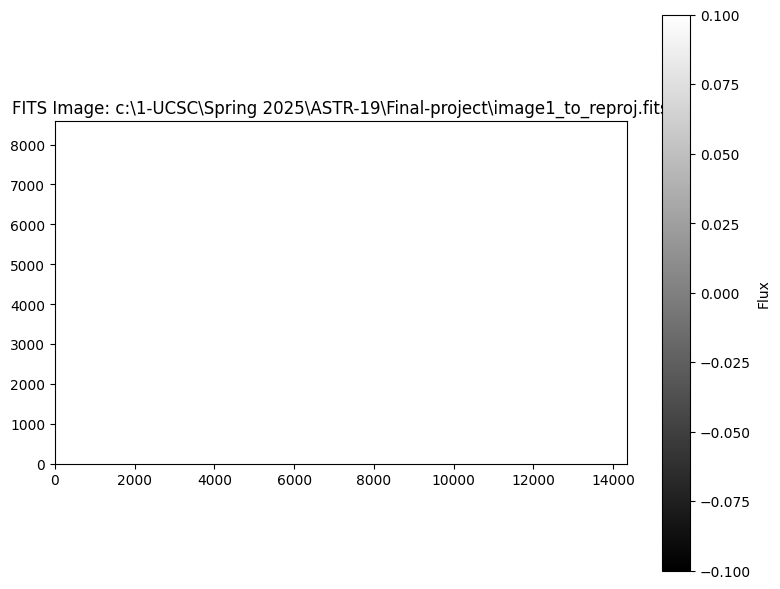

✅ Opened FITS file: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image2_to_reproj.fits
Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image2_to_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      73   (14339, 8582)   float64   
✅ Valid image data found.
Image shape: (8582, 14339)

=== Header Info (partial) ===
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14339                                                  
NAXIS2  =                 8582                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.40269180185 / [d] exposure start time in MJD                 
MJD-AVG =    59733.51213757989 / [d] exposure mid-point 

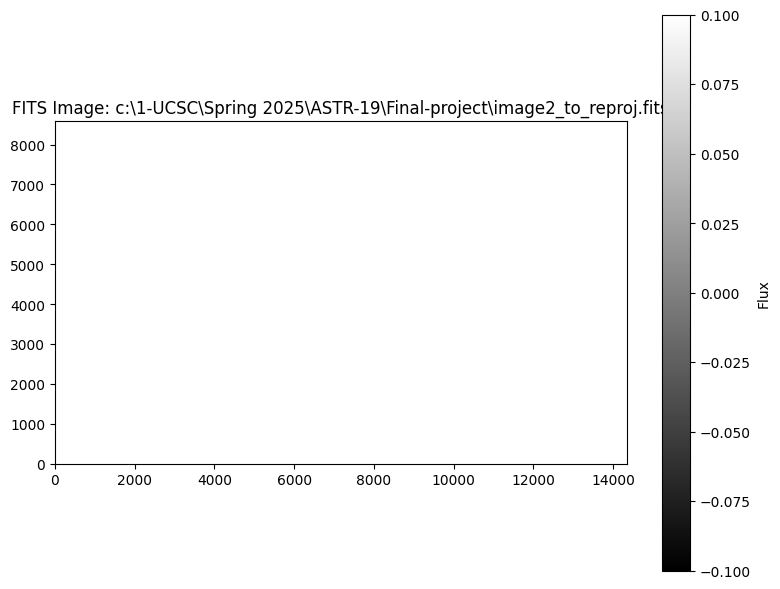

✅ Opened FITS file: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image3_to_reproj.fits
Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image3_to_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      73   (14339, 8582)   float64   
✅ Valid image data found.
Image shape: (8582, 14339)

=== Header Info (partial) ===
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14339                                                  
NAXIS2  =                 8582                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.40269180185 / [d] exposure start time in MJD                 
MJD-AVG =    59733.51213757989 / [d] exposure mid-point 

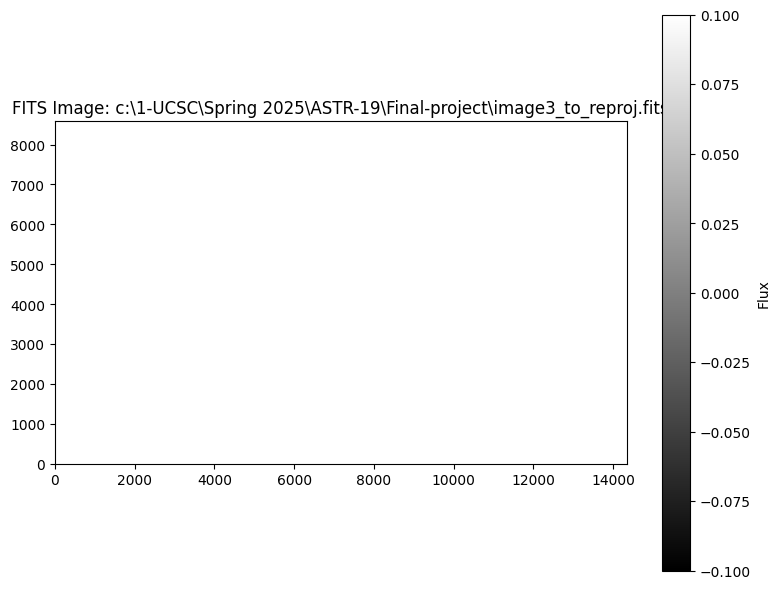

✅ Opened FITS file: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image4_to_reproj.fits
Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\image4_to_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      73   (14339, 8582)   float64   
✅ Valid image data found.
Image shape: (8582, 14339)

=== Header Info (partial) ===
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14339                                                  
NAXIS2  =                 8582                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.40269180185 / [d] exposure start time in MJD                 
MJD-AVG =    59733.51213757989 / [d] exposure mid-point 

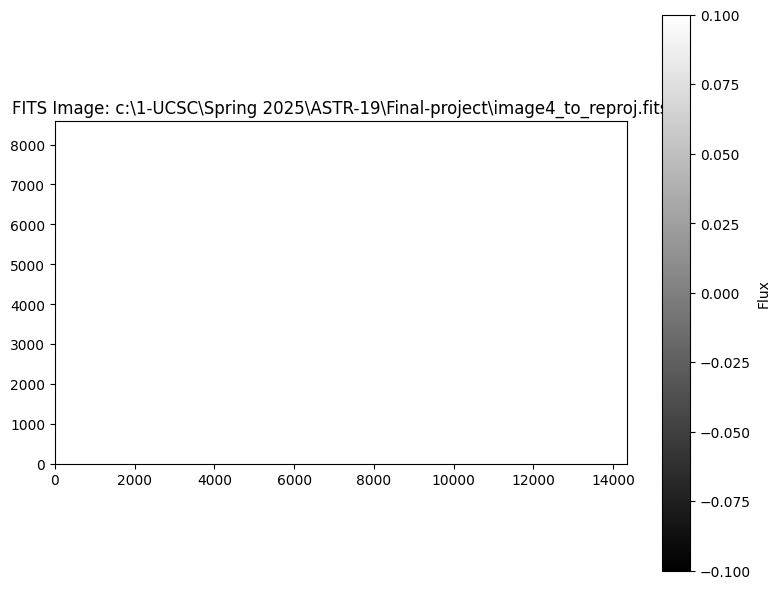

✅ Opened FITS file: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\data\jw02731-o001_t017_nircam_clear-f090w_i2d_to_reproj.fits
Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\data\jw02731-o001_t017_nircam_clear-f090w_i2d_to_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      73   (14339, 8582)   float64   
✅ Valid image data found.
Image shape: (8582, 14339)

=== Header Info (partial) ===
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14339                                                  
NAXIS2  =                 8582                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.40269180185 / [d] exposure start time in

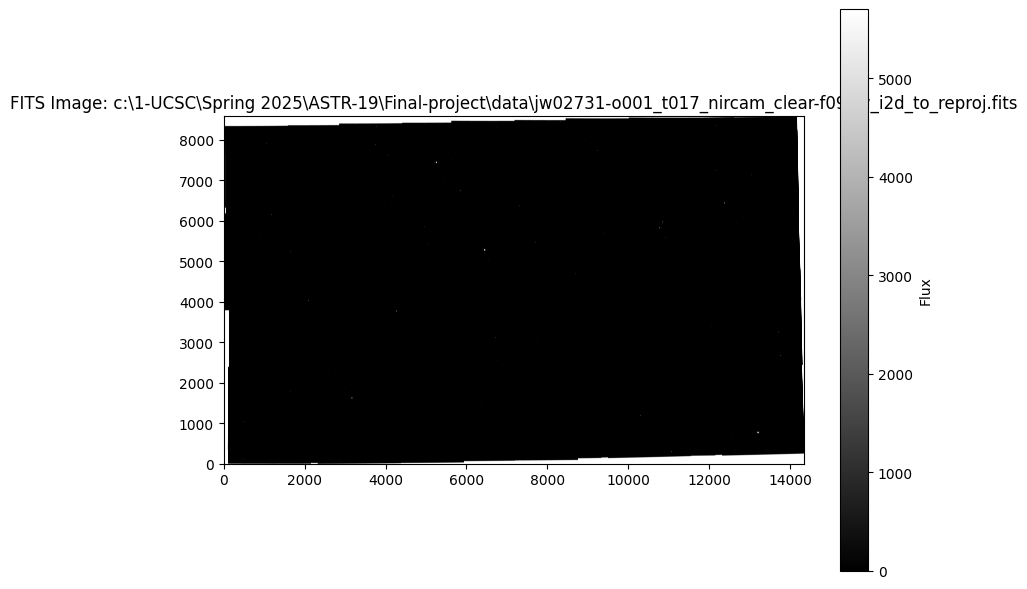

In [28]:
# To be sure, check the 5 fits files we have just created.
def check_fits(filename):
    try:
        # Attempt to open the FITS file
        with fits.open(filename) as hdul:
            print(f"✅ Opened FITS file: {filename}")
            hdul.info()

            # Try to read data from primary HDU
            data = hdul[0].data
            header = hdul[0].header

            if data is None:
                print("⚠️ No image data found in the primary HDU.")
                return

            if not isinstance(data, np.ndarray) or data.size == 0:
                print("❌ Invalid or empty image data.")
                return

            print("✅ Valid image data found.")
            print(f"Image shape: {data.shape}")
            print("\n=== Header Info (partial) ===")
            print(repr(header[:10]))  # Show first 10 header lines

            # Display the image
            plt.figure(figsize=(8, 6))
            plt.imshow(data, cmap='gray', origin='lower')
            plt.colorbar(label='Flux')
            plt.title(f"FITS Image: {filename}")
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"❌ Failed to open or process FITS file.\nError: {e}")

fits_files = [
        # These are files generated on 1st pass of the tutorial.
        os.path.join(cwd, "image1_to_reproj.fits"),
        os.path.join(cwd, "image2_to_reproj.fits"),
        os.path.join(cwd, "image3_to_reproj.fits"),
        os.path.join(cwd, "image4_to_reproj.fits"),
        os.path.join(cwd, "data", "jw02731-o001_t017_nircam_clear-f090w_i2d_to_reproj.fits")
]
for file in fits_files:
    check_fits(file)

# Combine 6 downloaded NGC 3324 into a false image

In [ ]:
from reproject import reproject_interp
    
def load_image(path):
    """Load and normalize the first available image in a FITS file."""
    with fits.open(path) as hdul:
        # Search for first HDU with image data
        for hdu in hdul:
            data = hdu.data
            if data is not None and isinstance(data, np.ndarray):
                # Normalize image to 0–1 using percentile scaling
                vmin, vmax = np.percentile(data, [1, 99])
                data = np.clip((data - vmin) / (vmax - vmin), 0, 1)
                return data

        raise ValueError(f"❌ No image data found in any HDU of {path}")

def make_false_color_image(paths, output_file):
    if len(paths) < 3:
        raise ValueError("Need at least 3 FITS files to make an RGB image.")

    print("🔍 Loading and normalizing FITS files...")

    images = []
    for p in paths:
        try:
            img = load_image(p)
            images.append(img)
        except Exception as e:
            print(f"⚠️ Skipping {p} — {e}")

    if len(images) < 3:
        raise RuntimeError("Not enough valid images to create RGB composite.")

    # Crop all images to the smallest common shape
    min_shape = np.min([img.shape for img in images], axis=0)
    images = [img[:min_shape[0], :min_shape[1]] for img in images]

    # Choose 3 channels
    R, G, B = images[0], images[2], images[4]

    rgb = np.stack([R, G, B], axis=-1)

    print(f"✅ Saving false-color image to: {output_file}")
    plt.imsave(output_file, rgb, origin='lower')

# --- Run ---
path = os.path.join("data", "MAST_2025-06-09T1947", "MAST_2025-06-09T1947", "JWST")
p1 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f090w", "jw02731-o001_t017_nircam_clear-f090w_i2d.fits")
p2 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f187n", "jw02731-o001_t017_nircam_clear-f187n_i2d.fits")
p3 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f200w", "jw02731-o001_t017_nircam_clear-f200w_i2d.fits")
p4 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f335m", "jw02731-o001_t017_nircam_clear-f335m_i2d.fits")
p5 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f444w", "jw02731-o001_t017_nircam_clear-f444w_i2d.fits")
p6 = os.path.join(path, "jw02731-o001_t017_nircam_f444w-f470n", "jw02731-o001_t017_nircam_f444w-f470n_i2d.fits")
paths = [p1, p2, p3, p4, p5, p6]

make_false_color_image(paths, "6-false-image-v1.png")

🔍 Loading and normalizing FITS files...
✅ Saving false-color image to: 7-false-image.png


In [3]:
from reproject import reproject_interp
# --- Safe loading for large reference image (e.g. f090w) ---
def load_reference_image(path):
    """Load a large 2D image and WCS (no size filtering)."""
    with fits.open(path, memmap=False) as hdul:
        for hdu in hdul:
            if not isinstance(hdu, (fits.PrimaryHDU, fits.ImageHDU)):
                continue
            if hdu.header.get("NAXIS", 0) != 2:
                continue
            try:
                data = hdu.data
                if data is None:
                    continue
                wcs = WCS(hdu.header, relax=True)
                return data, wcs
            except Exception as e:
                print(f"⚠️ Failed to load reference {path} — {e}")
        raise ValueError(f"❌ No valid 2D reference image in {path}")

# --- Normalize image to 0–1 using percentile contrast ---
def normalize_image(data):
    vmin, vmax = np.percentile(data, [1, 99])
    return np.clip((data - vmin) / (vmax - vmin), 0, 1)

# --- Main function ---
def make_false_color_reprojected(paths, output_file):
    print("🔍 Loading reference image for WCS alignment...")
    ref_data, ref_wcs = load_reference_image(paths[0])
    shape_out = ref_data.shape

    images = []
    for path in paths:
        try:
            data, wcs = load_reference_image(path) # load_image_and_wcs(path)
            reprojected, _ = reproject_interp((data, wcs), ref_wcs, shape_out=shape_out)
            images.append(normalize_image(reprojected))
            print(f"✅ Reprojected {os.path.basename(path)}")
        except Exception as e:
            print(f"⚠️ Skipped {path} — {e}")

    if len(images) < 3:
        print(f"❌ Only {len(images)} usable images found. Need at least 3.")
        return

    R, G, B = images[:3]
    rgb = np.stack([R, G, B], axis=-1)

    print(f"🎨 Saving false-color image to: {output_file}")
    plt.imsave(output_file, rgb, origin='lower')


# --- Run it with your 6 JWST image paths ---
path = os.path.join("data", "MAST_2025-06-09T1947", "MAST_2025-06-09T1947", "JWST")
p1 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f090w", "jw02731-o001_t017_nircam_clear-f090w_i2d.fits")
p2 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f187n", "jw02731-o001_t017_nircam_clear-f187n_i2d.fits")
p3 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f200w", "jw02731-o001_t017_nircam_clear-f200w_i2d.fits")
p4 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f335m", "jw02731-o001_t017_nircam_clear-f335m_i2d.fits")
p5 = os.path.join(path, "jw02731-o001_t017_nircam_clear-f444w", "jw02731-o001_t017_nircam_clear-f444w_i2d.fits")
p6 = os.path.join(path, "jw02731-o001_t017_nircam_f444w-f470n", "jw02731-o001_t017_nircam_f444w-f470n_i2d.fits")
paths = [p1, p2, p3, p4, p5, p6]

make_false_color_reprojected(paths, "6-false-image-v3.png")

🔍 Loading reference image for WCS alignment...


Set DATE-AVG to '2022-06-03T12:17:28.687' from MJD-AVG.
Set DATE-END to '2022-06-03T14:54:43.830' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.567170 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654335564.228 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


✅ Reprojected jw02731-o001_t017_nircam_clear-f090w_i2d.fits


Set DATE-AVG to '2022-06-03T11:43:37.007' from MJD-AVG.
Set DATE-END to '2022-06-03T14:26:16.631' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.557313 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654186065.609 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


✅ Reprojected jw02731-o001_t017_nircam_clear-f187n_i2d.fits


Set DATE-AVG to '2022-06-03T12:45:26.326' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.574431 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654445751.087 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


✅ Reprojected jw02731-o001_t017_nircam_clear-f200w_i2d.fits


Set DATE-AVG to '2022-06-03T12:17:28.706' from MJD-AVG.
Set DATE-END to '2022-06-03T14:54:43.830' from MJD-END'. [astropy.wcs.wcs]


✅ Reprojected jw02731-o001_t017_nircam_clear-f335m_i2d.fits


Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]


✅ Reprojected jw02731-o001_t017_nircam_clear-f444w_i2d.fits


Set DATE-AVG to '2022-06-03T11:43:37.025' from MJD-AVG.
Set DATE-END to '2022-06-03T14:26:16.695' from MJD-END'. [astropy.wcs.wcs]


✅ Reprojected jw02731-o001_t017_nircam_f444w-f470n_i2d.fits
🎨 Saving false-color image to: 6-false-image-v3.png


In [2]:
# Check and display the false image file
def check_and_display_png(png_path):
    """Validate and display a PNG image."""
    if not os.path.exists(png_path):
        print(f"❌ File not found: {png_path}")
        return

    try:
        with Image.open(png_path) as img:
            img.verify()  # Check file integrity (but closes image)
        print(f"✅ {png_path} is a valid PNG.")

        # Reopen for display (because verify() closes it)
        with Image.open(png_path) as img:
            plt.figure(figsize=(8, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title("PNG Preview")
            plt.show()

    except Exception as e:
        print(f"❌ Invalid PNG or failed to open.\nError: {e}")

check_and_display_png("6-false-image-v2.png")

❌ Invalid PNG or failed to open.
Error: name 'Image' is not defined
